Ting Pan, github ID: [tingpan](https://github.com/tingpan)

# Applying K-means Algorithms on NBA Player Clustering

In the previous [project](http://dota666.com/basketball/), we just did a very simple statistics and visualization, which is not insightful and interesting. I think we could apply some unsupervised clustering (such as K-Means) with Shogun API on the dataset to classify the player into different types. 

This notebook shows clustering NBA Players into different types with K-means in Shogun. Since I do not know the optimal value of k, I will use K-means and Elbow Method to find out the most suitable value for k.

The first step is loading the dataset. The file`play_freq.data` contains play-type stats of NBA Season 2015-16 from [stats.nba.com](http://stats.nba.com/). This CSV file has 11 columns in total. The first column is the players' name and following ten columns are the frequency of ten play types (Transition, Isolation, Pick & Roll, Pick & Roll: Roll Man, Post-Up, Spot-Up, Hand-Off, Cut, Off Screen and Rebound). There are nearly 400 players data in this file. The loaded data are the features for training.

In [1]:
from numpy import array

def load_data():
    f = open('./play_freq.data')
    features = []
    names = []
    for line in f:
        words = line.rstrip().split(',')
        # Store player names
        names.append(words[0])
        # Store features of each player
        features.append([float(i) for i in words[1:]])

    f.close()

    return (array(features).T, names)

data, names = load_data()

Now, Let's define a method for K-means cluster with Shogun Python API. 

In [2]:
from modshogun import *

def train_kmeans(k, data):
    train_features = RealFeatures(data)
    
    # calculate euclidean distance of features
    distance = EuclideanDistance(train_features, train_features)

    # initialize KMeans object
    kmeans = KMeans(k, distance, True)

    # training kmeans
    kmeans.train(train_features)

    # labels for data points
    result = kmeans.apply()
    centers = kmeans.get_cluster_centers()
    radiuses = kmeans.get_radiuses()
    
    return result, centers, radiuses

Now I can build a model using the dataset with a specified value for number of clusters, which is k.

In [3]:
# Specifying the number of clusters(k)
# However, the actual amount of types is unknown

k = 8
result, centers, radiuses = train_kmeans(k, data)

Since I don't know the optimal value of k, I will use Elbow Method to find out it. I will run K-means clustering on the dataset with an increasing k. For each k, I will calculate the loss. The best k would be the k with a small loss, and the trend of loss decreasing is diminishing.

I will run K-means with a range of k and calculate the sum of radiuses and for each k. To avoid the local minimum, I will train the dataset ten times and get the average cost. (Since this is only a demo, I only train ten times to increase the speed)

In [8]:
ys = []
xs = []

for k in range(5, 40):
    xs.append(k)
    _ys = []
    
    for i in range(1, 31):
        result, centers, radiuses = train_kmeans(k, data)
        _ys.append(sum(radiuses)/k)
        
    ys.append(sum(_ys)/30)

Then, I will plot a line chart of the average cost for each k. Can see that the line chart looks like an arm, and the "elbow" of the arm is the value of the best k.

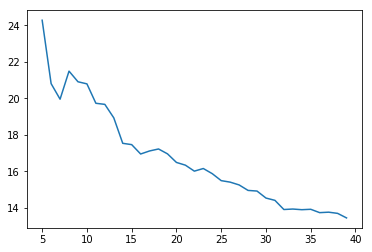

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(xs,ys)
plt.show()

As shown in figure, the best k is around 13. As this is a real world dataset, so we could deside final value of k by analysing real world cases.

Firstly I will get all players types with this k. 

In [ ]:
k = 13
result, centers, radiuses = train_kmeans(k, data)

In order to show whether this is the right k for clustering, I will visualise some clusters with bar chart and interpret why players should be in that cluster.

Here I will use bar chart to visualise the cluster 2:

In the next step of this project, I will apply Decision Tree Learning (C4.5) to train a model for classifying new players.